## Baseline

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.head(10)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [112]:
target_col = "smoking"

target_col_vals = train_df[target_col]

test_ids_col = test_df["id"]

In [113]:
train_df = train_df.drop("id", axis=1)
test_df = test_df.drop("id", axis=1)

train_df = train_df.drop(target_col, axis=1)


In [114]:
categoric_cols = ["Urine protein", "hearing(left)", "hearing(right)", "dental caries"]
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.difference(categoric_cols)

### 1. Заполнение пропусков

In [115]:
print("Количество строк: ", train_df.shape[0])
print("Количество непустых значений в каждом столбце:")
print(train_df.count())

Количество строк:  159256
Количество непустых значений в каждом столбце:
age                    159256
height(cm)             159256
weight(kg)             159256
waist(cm)              159256
eyesight(left)         159256
eyesight(right)        159256
hearing(left)          159256
hearing(right)         159256
systolic               159256
relaxation             159256
fasting blood sugar    159256
Cholesterol            159256
triglyceride           159256
HDL                    159256
LDL                    159256
hemoglobin             159256
Urine protein          159256
serum creatinine       159256
AST                    159256
ALT                    159256
Gtp                    159256
dental caries          159256
dtype: int64


In [116]:
print("Количество строк: ", test_df.shape[0])
print("Количество непустых значений в каждом столбце:")
print(test_df.count())

Количество строк:  106171
Количество непустых значений в каждом столбце:
age                    106171
height(cm)             106171
weight(kg)             106171
waist(cm)              106171
eyesight(left)         106171
eyesight(right)        106171
hearing(left)          106171
hearing(right)         106171
systolic               106171
relaxation             106171
fasting blood sugar    106171
Cholesterol            106171
triglyceride           106171
HDL                    106171
LDL                    106171
hemoglobin             106171
Urine protein          106171
serum creatinine       106171
AST                    106171
ALT                    106171
Gtp                    106171
dental caries          106171
dtype: int64


Метод `count` выводит только непустые значения, и, так-как эти числа в обоих датасетах совпадают с количеством строк, следует, что пропусков в датасетах нет.

### 2. Обработка выбросов

Было решено для детекции использовать метод межквартального размаха, а обнаруженные выбросы заменить на медиану.

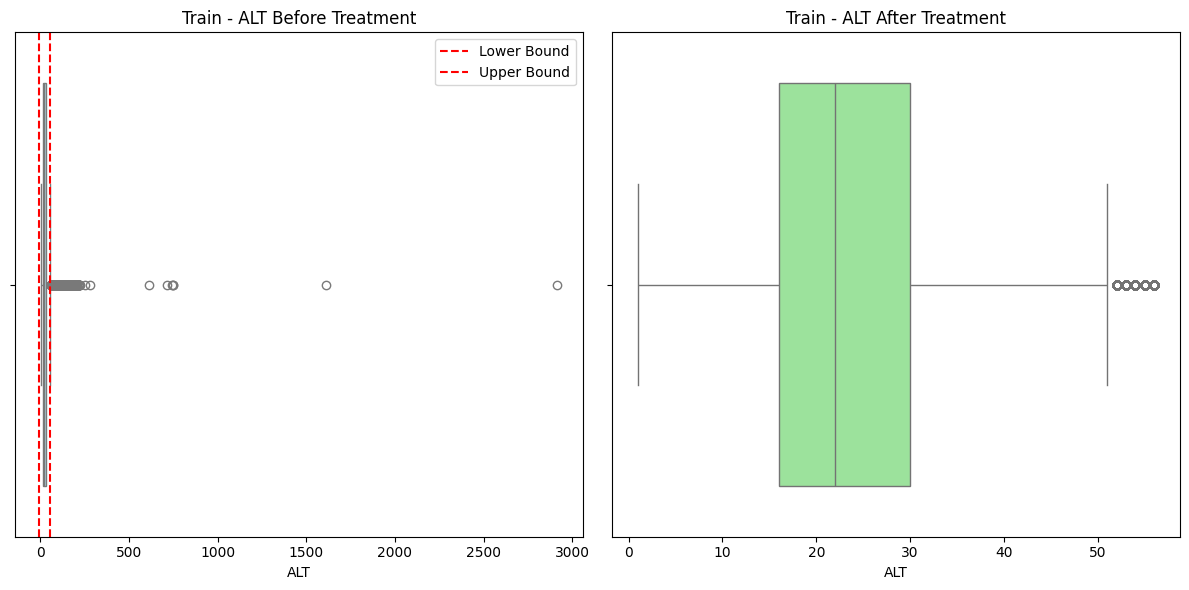

Количество выбросов в столбце 'ALT': 6746


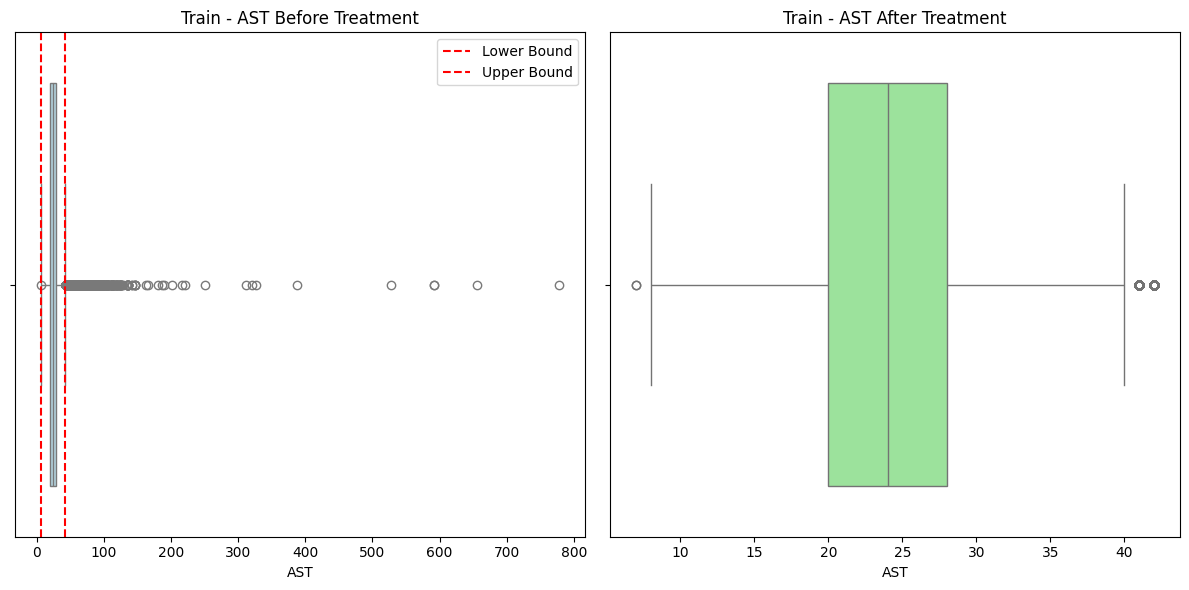

Количество выбросов в столбце 'AST': 6337


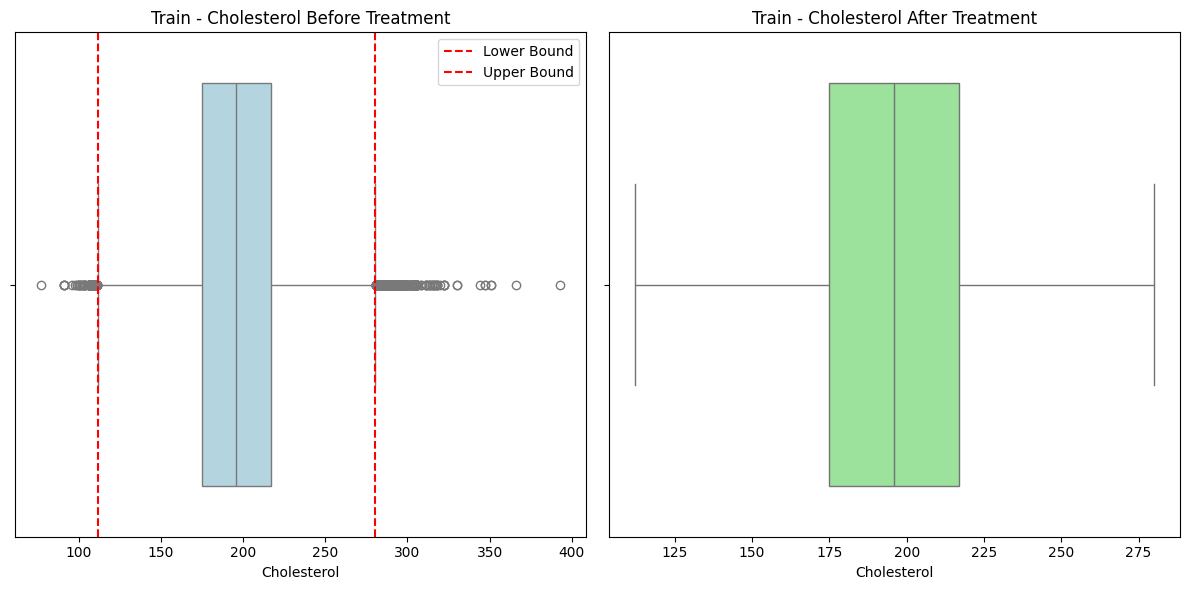

Количество выбросов в столбце 'Cholesterol': 430


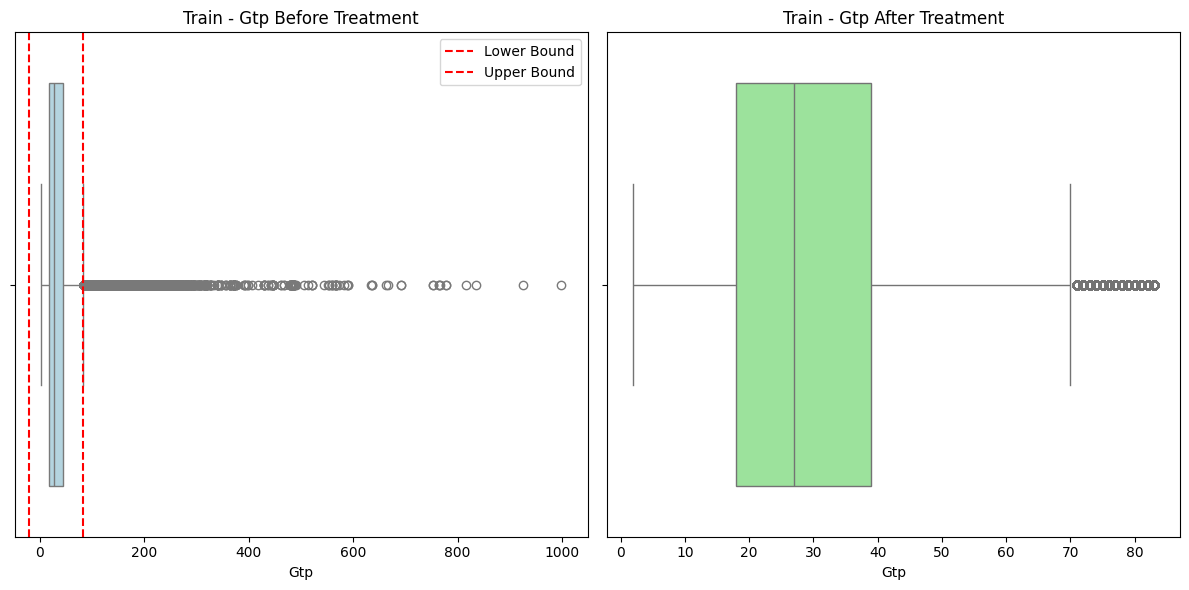

Количество выбросов в столбце 'Gtp': 8792


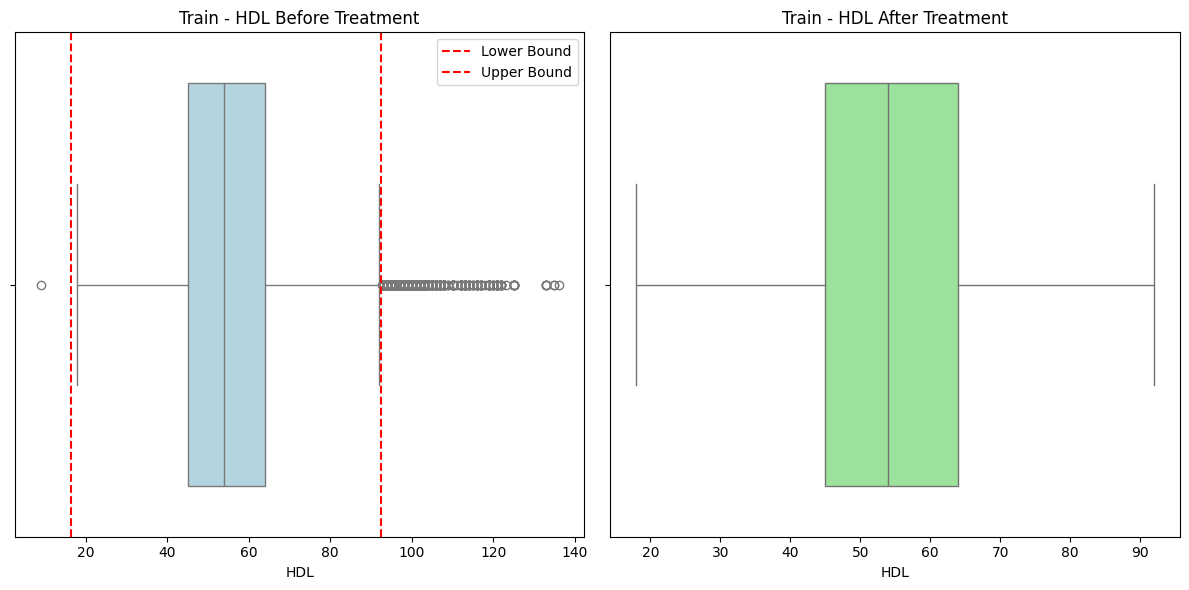

Количество выбросов в столбце 'HDL': 1932


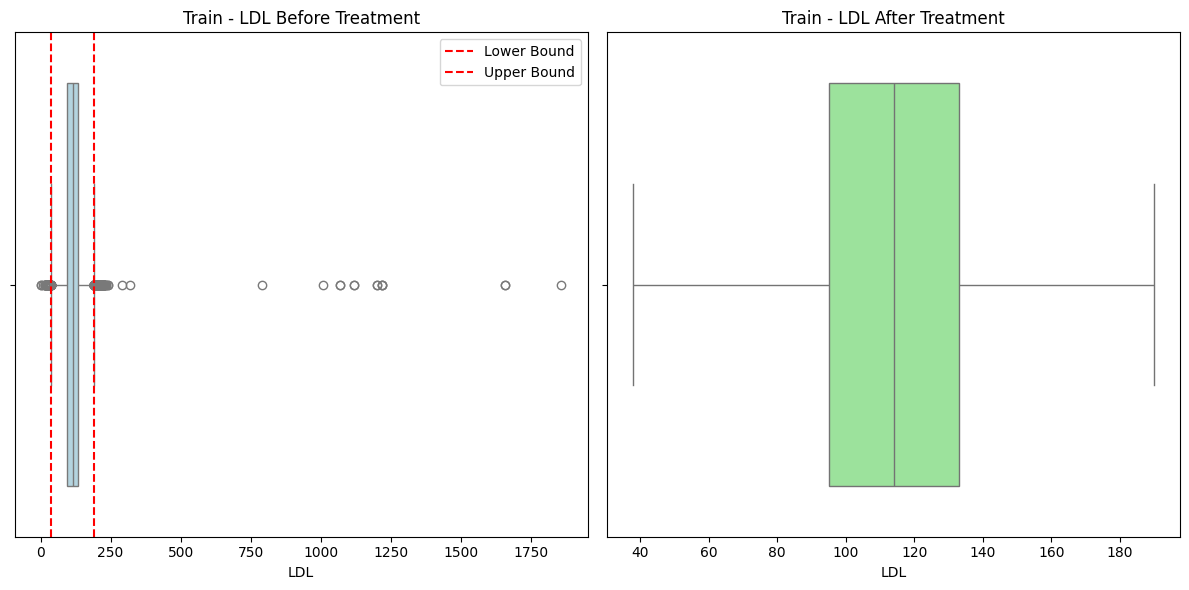

Количество выбросов в столбце 'LDL': 495


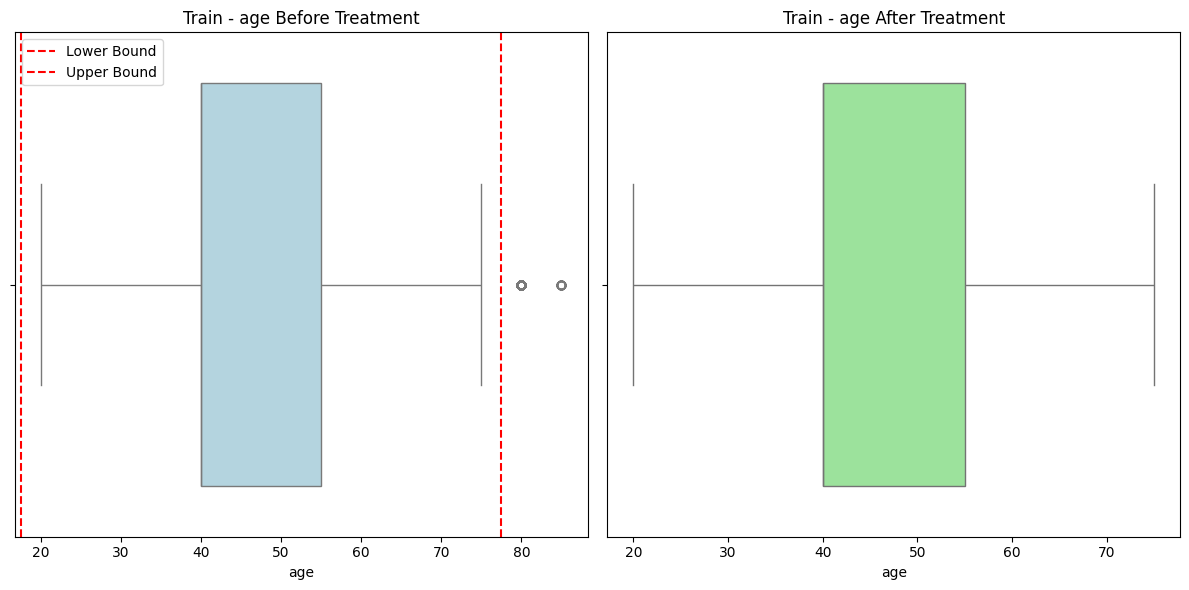

Количество выбросов в столбце 'age': 682


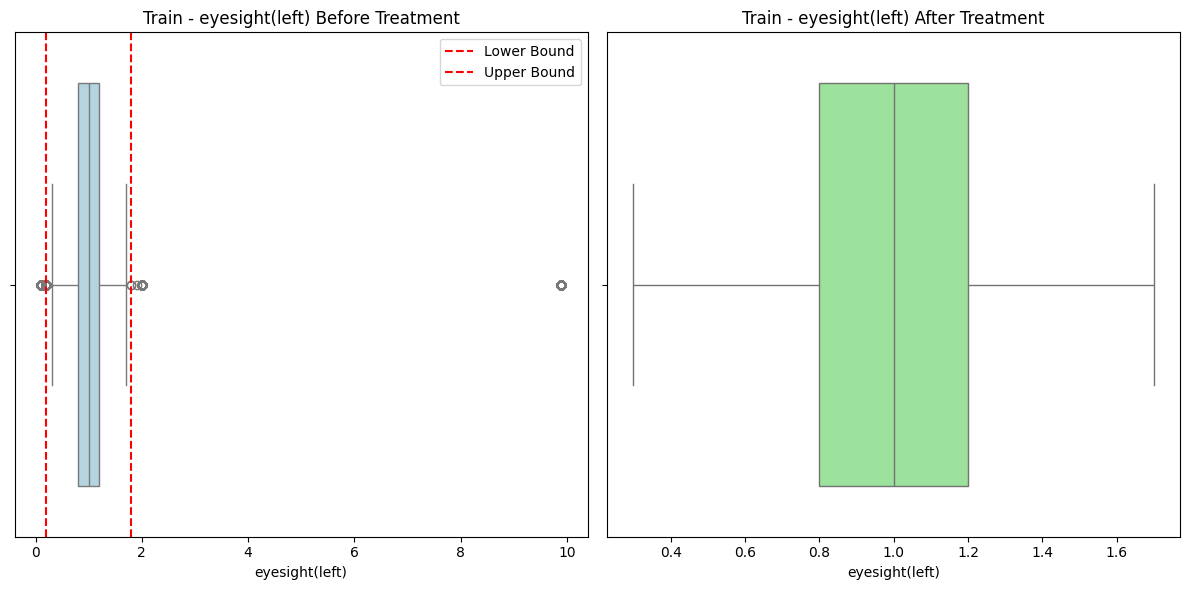

Количество выбросов в столбце 'eyesight(left)': 2324


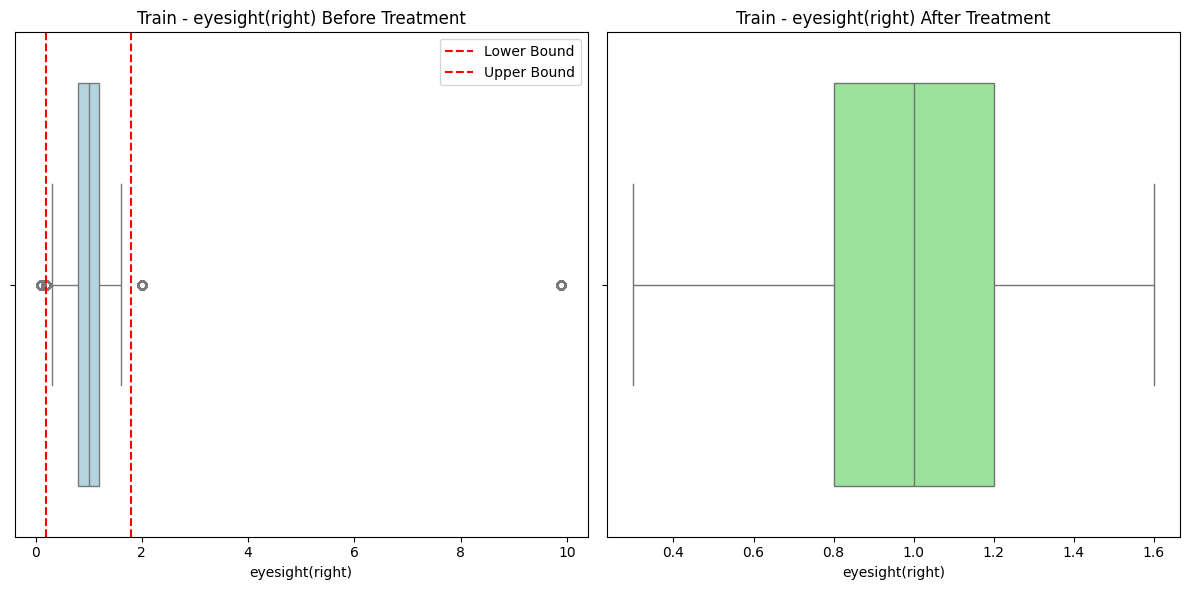

Количество выбросов в столбце 'eyesight(right)': 2493


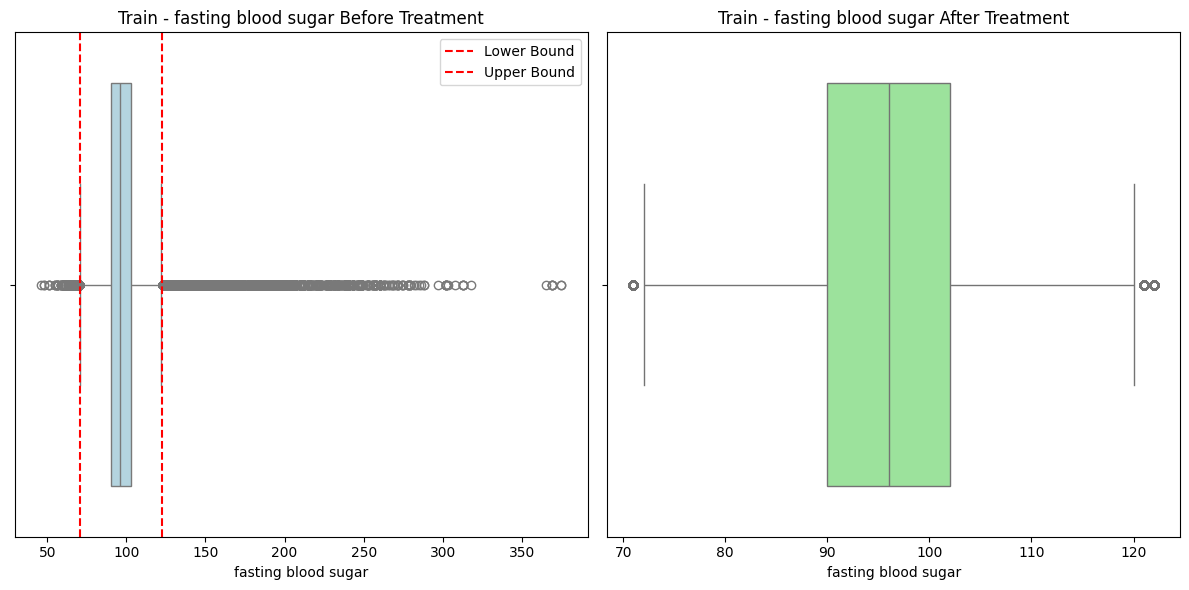

Количество выбросов в столбце 'fasting blood sugar': 8160


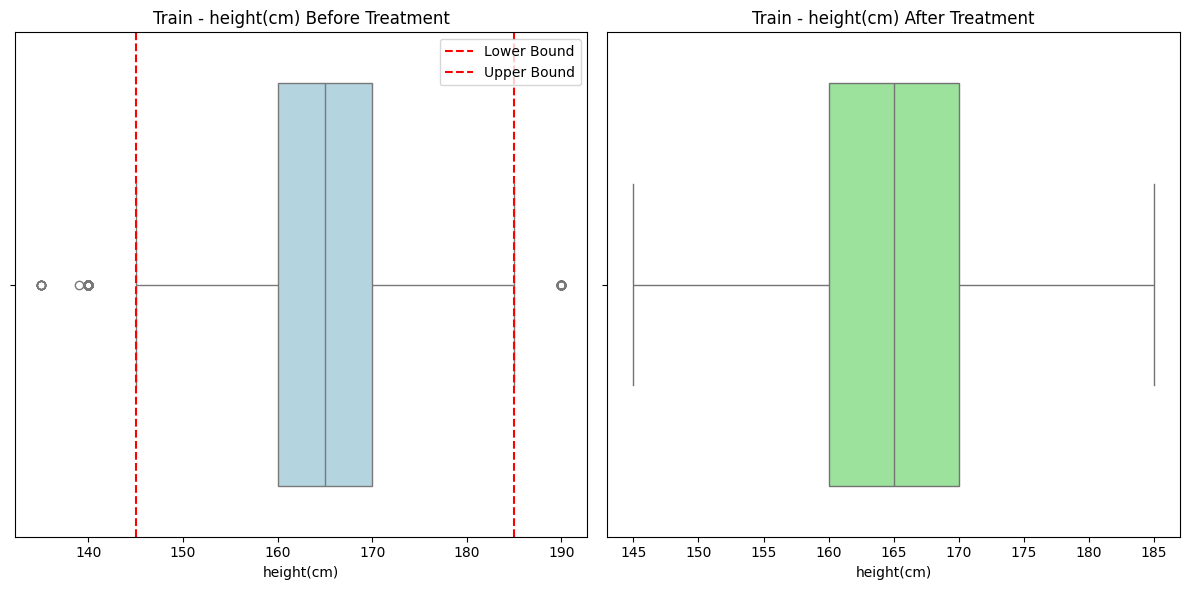

Количество выбросов в столбце 'height(cm)': 463


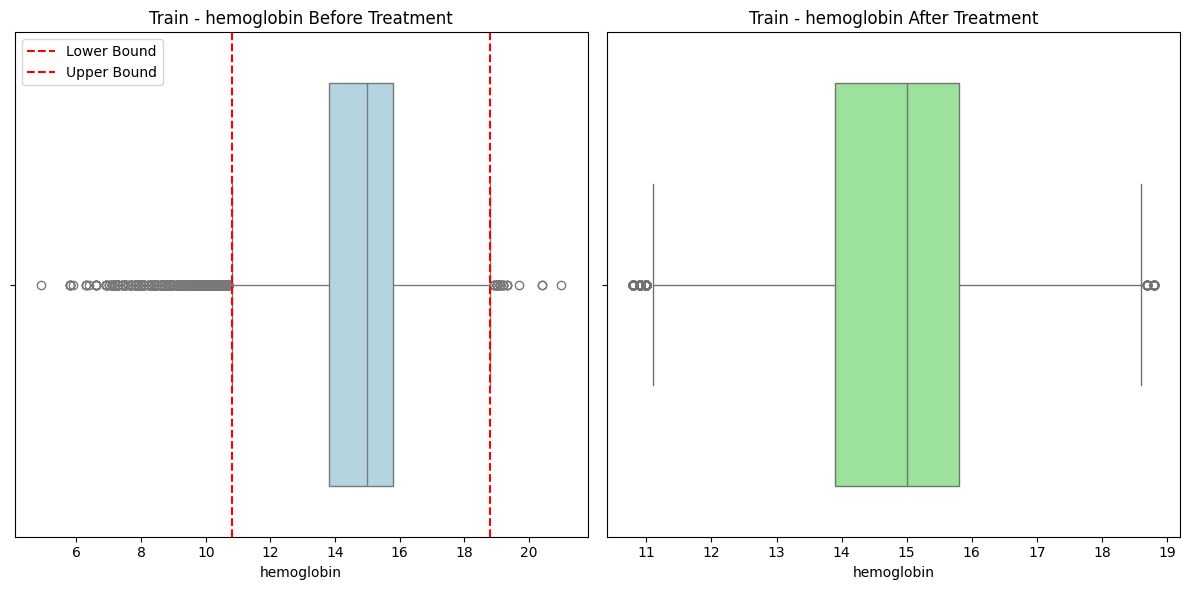

Количество выбросов в столбце 'hemoglobin': 1493


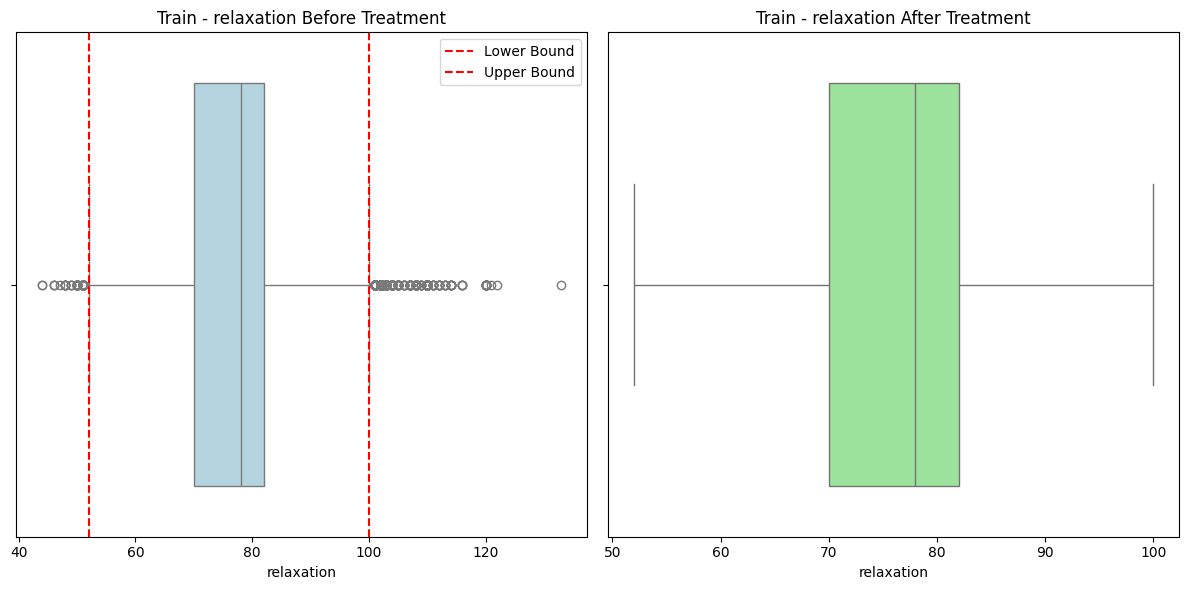

Количество выбросов в столбце 'relaxation': 981


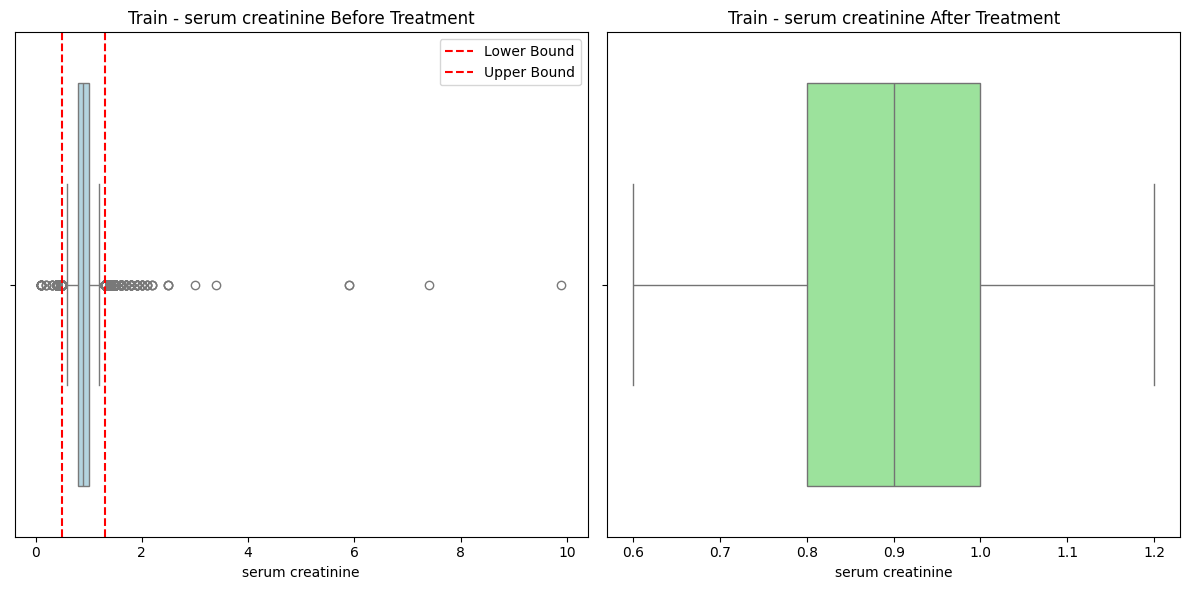

Количество выбросов в столбце 'serum creatinine': 5943


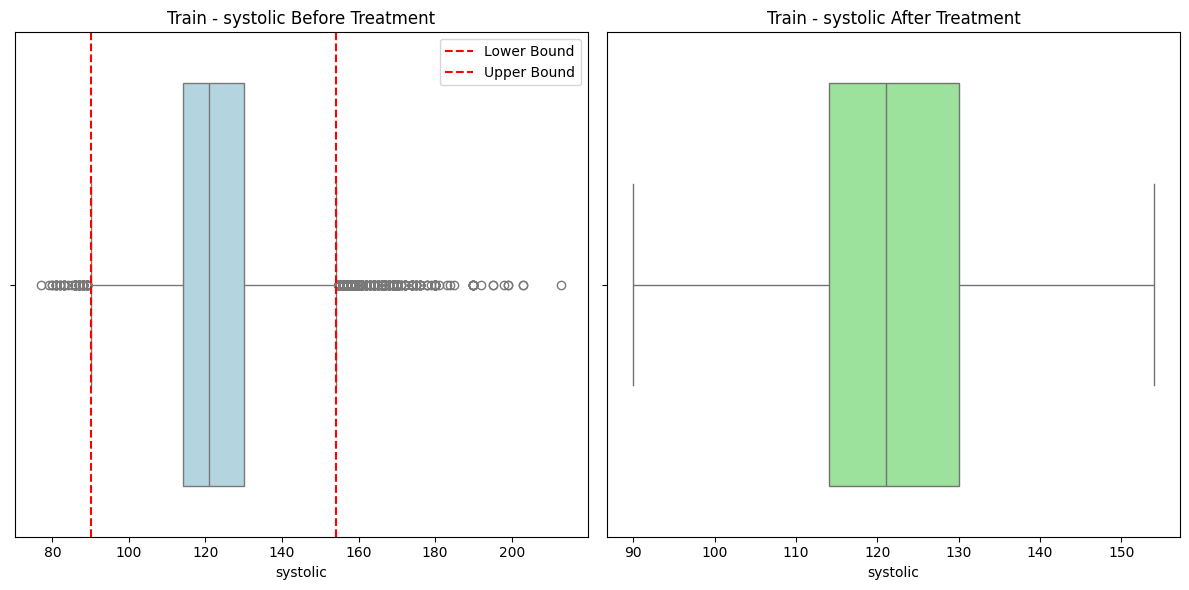

Количество выбросов в столбце 'systolic': 1592


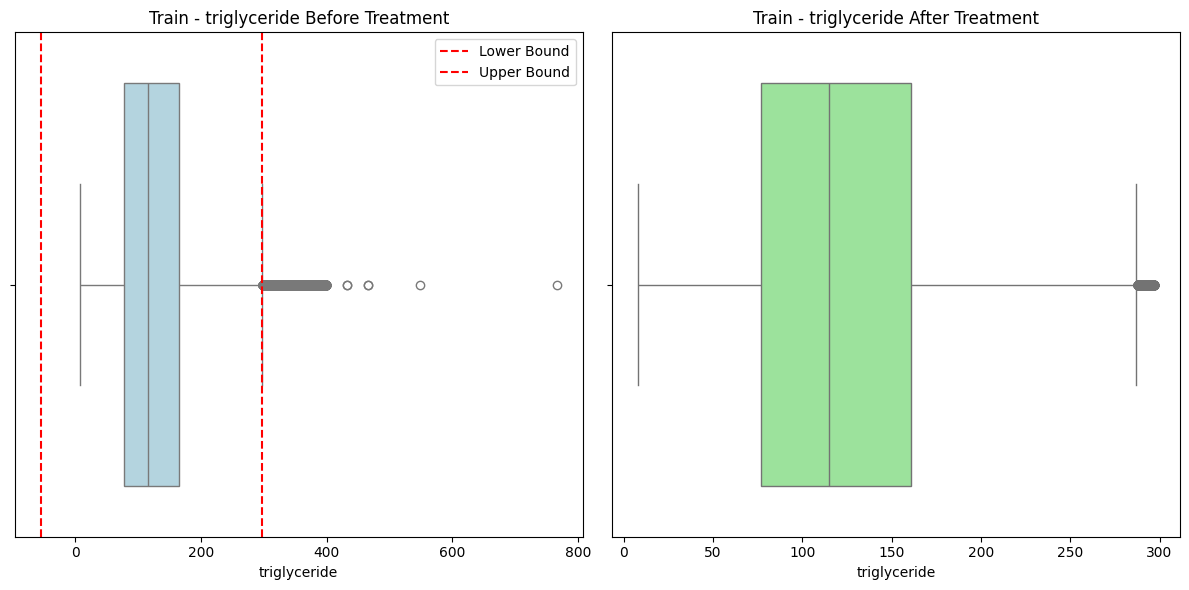

Количество выбросов в столбце 'triglyceride': 3087


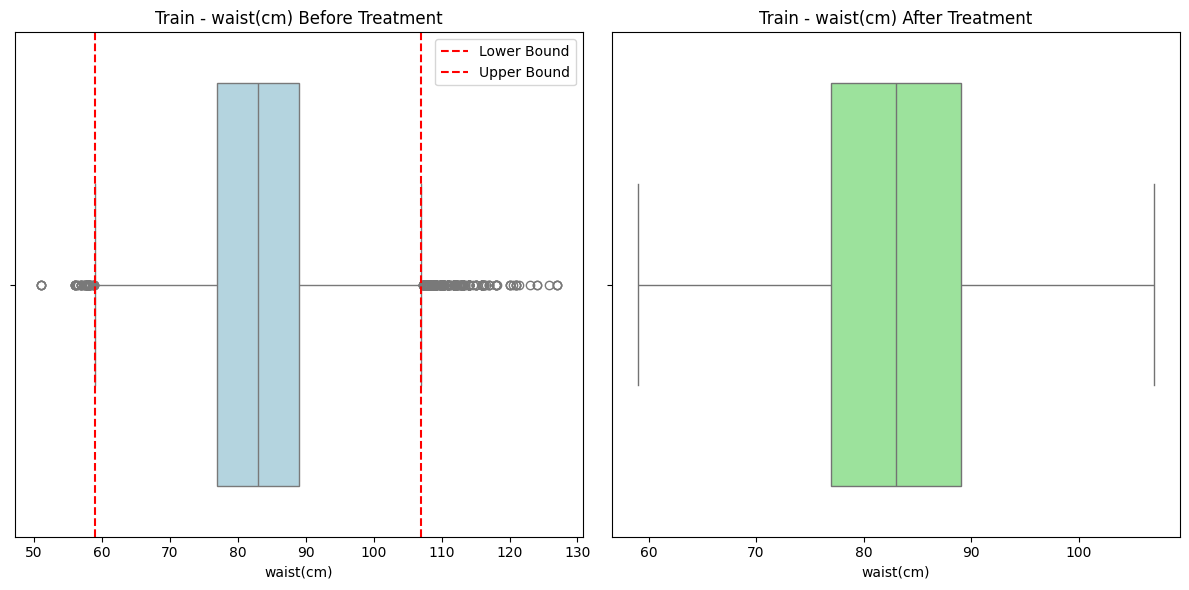

Количество выбросов в столбце 'waist(cm)': 858


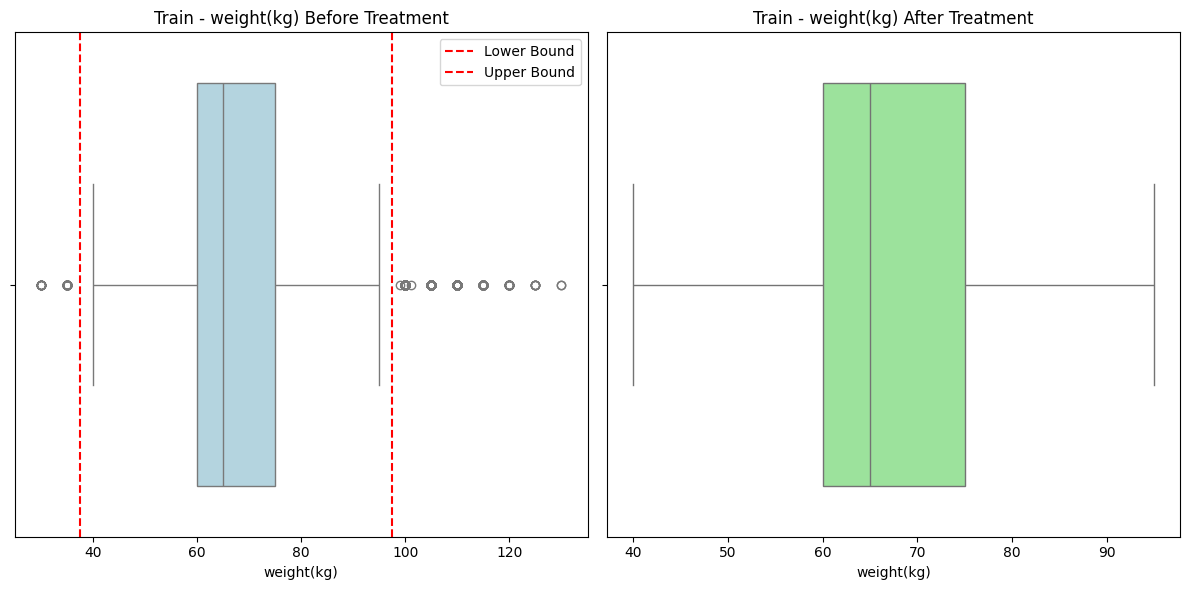

Количество выбросов в столбце 'weight(kg)': 2296
Количество выбросов в столбце 'ALT': 3864
Количество выбросов в столбце 'AST': 4272
Количество выбросов в столбце 'Cholesterol': 281
Количество выбросов в столбце 'Gtp': 5681
Количество выбросов в столбце 'HDL': 1306
Количество выбросов в столбце 'LDL': 336
Количество выбросов в столбце 'age': 519
Количество выбросов в столбце 'eyesight(left)': 1612
Количество выбросов в столбце 'eyesight(right)': 1639
Количество выбросов в столбце 'fasting blood sugar': 5467
Количество выбросов в столбце 'height(cm)': 303
Количество выбросов в столбце 'hemoglobin': 987
Количество выбросов в столбце 'relaxation': 680
Количество выбросов в столбце 'serum creatinine': 3977
Количество выбросов в столбце 'systolic': 1100
Количество выбросов в столбце 'triglyceride': 2194
Количество выбросов в столбце 'waist(cm)': 555
Количество выбросов в столбце 'weight(kg)': 1464


In [108]:
def detect_outliers_and_change_to_median(df, features, df_name):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (df[feature] < lower_bound) | (df[feature] > upper_bound)

        if df_name == "Train": # Нарисуем только для одного датасета
            before_treatment = df[feature].copy()

        median = df[feature].median()
        df[feature] = df[feature].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

        if df_name == "Train": # Нарисуем только для одного датасета
            after_treatment = df[feature]

            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            sns.boxplot(x=before_treatment, color="lightblue", ax=axes[0])
            axes[0].axvline(lower_bound, color="red", linestyle="--", label="Lower Bound")
            axes[0].axvline(upper_bound, color="red", linestyle="--", label="Upper Bound")
            axes[0].set_title(f"{df_name} - {feature} Before Treatment")
            axes[0].legend()

            sns.boxplot(x=after_treatment, color="lightgreen", ax=axes[1])
            axes[1].set_title(f"{df_name} - {feature} After Treatment")

            plt.tight_layout()
            plt.show()

        print(f"Количество выбросов в столбце '{feature}': {outliers_mask.sum()}")
        
    return df

train_df = detect_outliers_and_change_to_median(train_df, numeric_cols, "Train")
test_df = detect_outliers_and_change_to_median(test_df, numeric_cols, "Test")

### 3. Генерация признаков

Объединим рост и вес в один признак - индекс массы тела `BMI` 

In [117]:
train_df['BMI'] = train_df['weight(kg)'] / ((train_df['height(cm)']/100) ** 2)
test_df['BMI'] = test_df['weight(kg)'] / ((test_df['height(cm)']/100) ** 2)

numeric_cols = numeric_cols.append(pd.Index(['BMI']))

train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,22.038567
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,23.875115
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,25.951557
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,29.320988
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,22.038567


### 4. Масштабирование

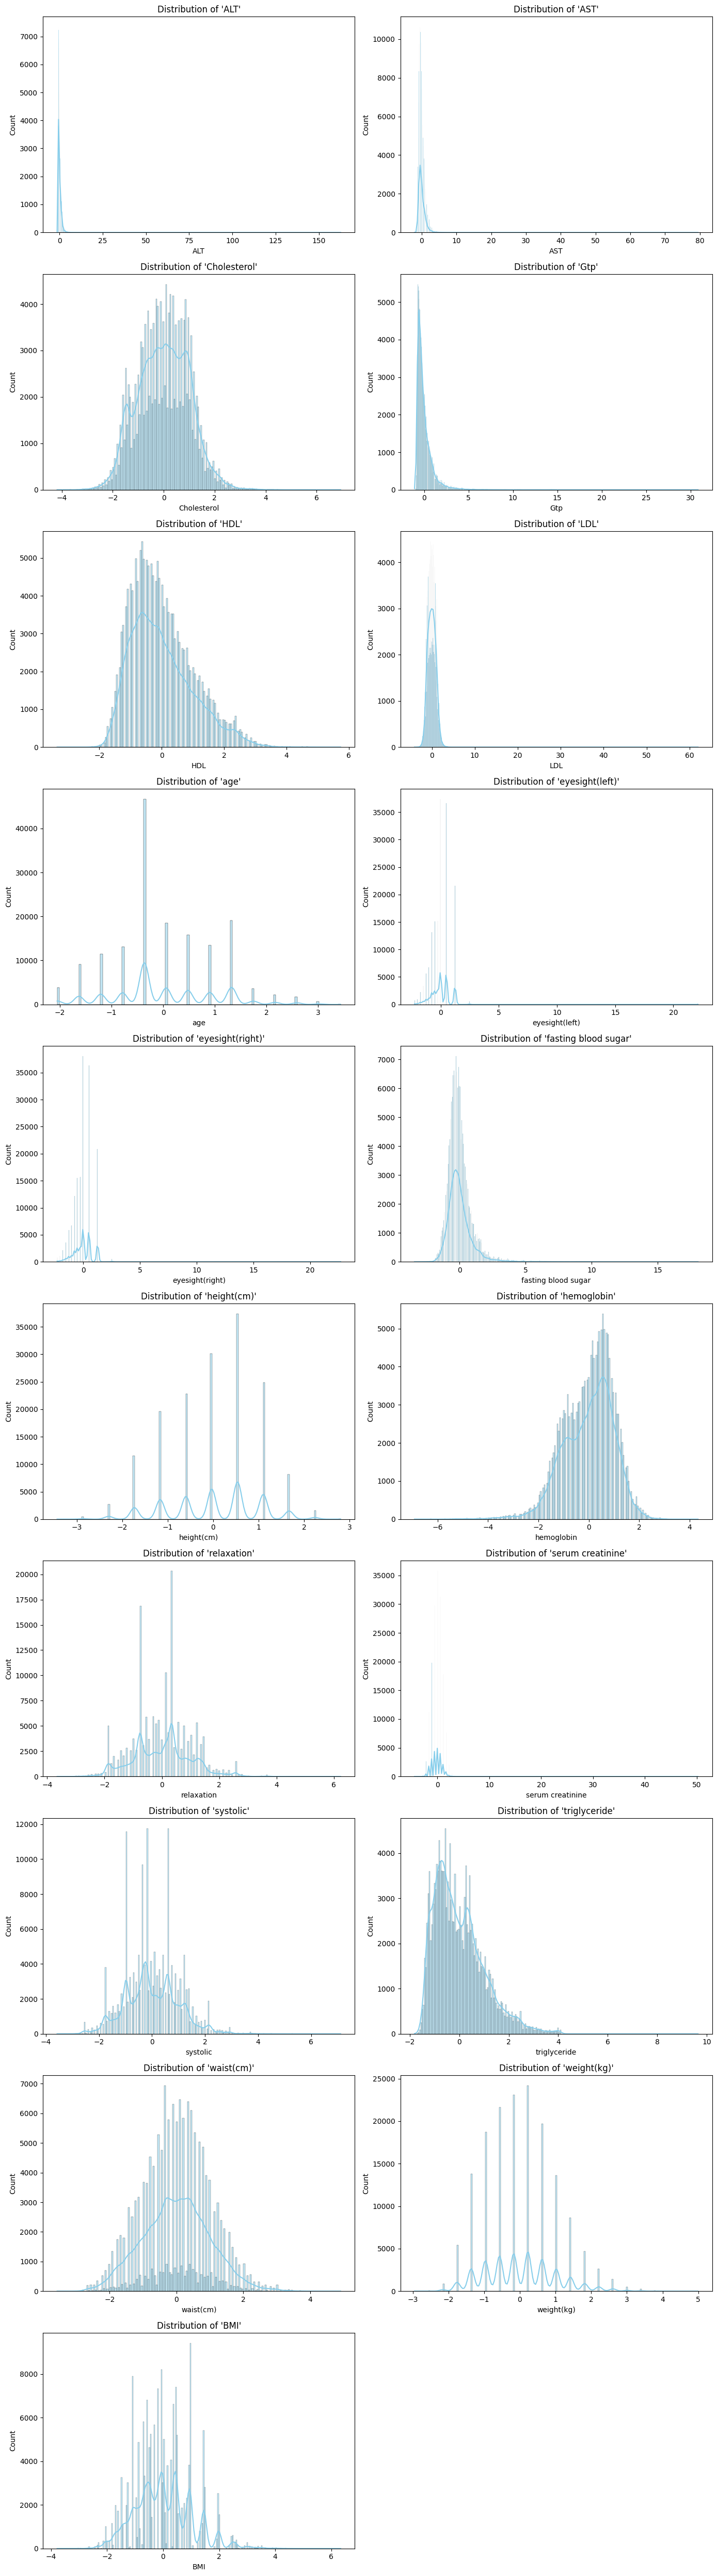

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI
0,0.902985,-0.030268,-0.567581,-0.223489,-1.257856,-1.022156,1,1,0.981702,1.125777,...,-1.135246,-1.406581,1.189928,1,0.597927,-0.371570,-0.087326,-0.295342,0,-0.716686
1,2.169636,-0.030268,-0.170319,0.669577,-1.009169,-0.767247,2,2,1.845852,0.681066,...,0.082162,0.404573,0.980315,1,1.155511,0.156700,-0.199983,0.025124,1,-0.171497
2,-2.052535,0.536694,0.624205,-0.223489,-1.506543,-1.277064,1,1,-0.353802,-0.208355,...,-0.777185,-0.767350,1.818767,1,-0.517239,0.156700,0.250645,0.537870,0,0.444907
3,-0.785883,1.670617,2.213252,2.455708,1.229017,0.507296,1,1,0.667465,1.236955,...,-1.278470,-0.447734,0.770702,1,0.597927,-0.582878,0.025331,-0.199202,1,1.445142
4,-1.208100,-0.030268,-0.567581,-0.279305,1.229017,-0.002521,1,1,-0.118125,-0.097177,...,-0.848797,-0.767350,0.421347,1,-0.517239,-0.688532,-0.763267,-0.615808,0,-0.716686


In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

def plot_feature_distributions(df, numeric_cols):
    num_features = len(numeric_cols)
    rows = (num_features + 1) // 2

    fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))
    axes = axes.flatten()
    
    for i, feature in enumerate(numeric_cols):
        sns.histplot(df[feature], kde=True, ax=axes[i], color="skyblue")
        axes[i].set_title(f"Distribution of '{feature}'")
        axes[i].set_xlabel(feature)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_feature_distributions(train_df, numeric_cols)

train_df.head()

### 5. Выявление сильно кореллирующих признаков

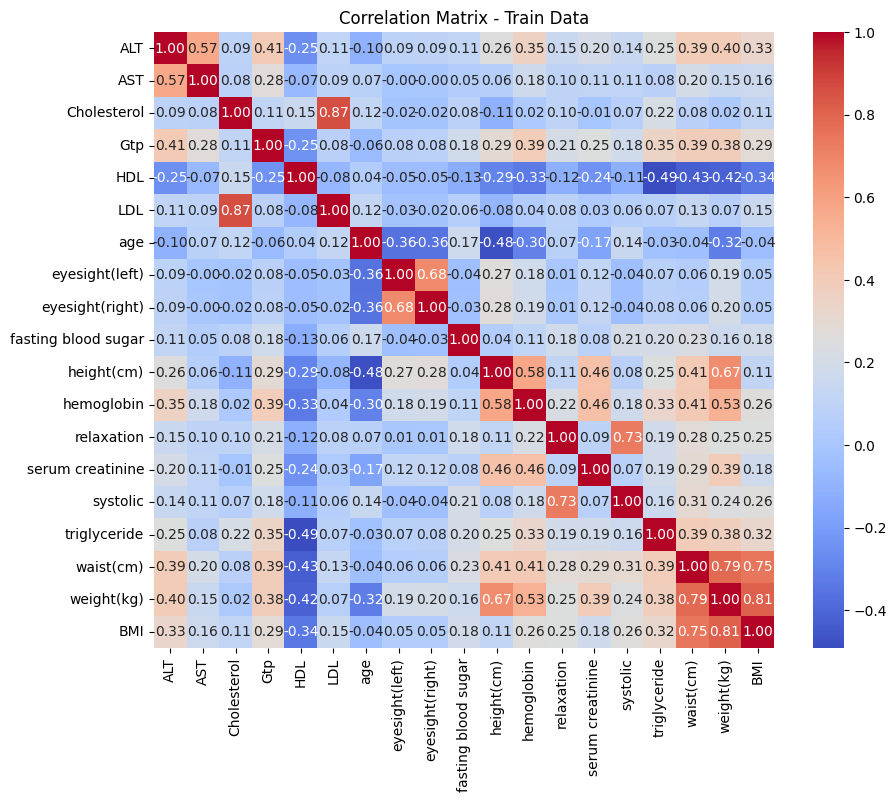

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

train_corr = train_df[numeric_cols].corr()

def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title(title)
    plt.show()

plot_correlation_heatmap(train_corr, "Correlation Matrix - Train Data")

In [50]:
train_df = train_df.drop(columns=["LDL", "waist(cm)", "weight(kg)", "height(cm)"])
test_df = test_df.drop(columns=["LDL", "waist(cm)", "weight(kg)", "height(cm)"])

train_df.head()

,age,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI
0,0.936081,-1.724797,-1.382283,1,1,1.059580,1.175633,-0.221830,-0.845966,-0.140400,-1.166219,1.237202,1,0.699910,-0.379508,0.064601,-0.222814,0,-0.692192
1,2.228313,-1.382271,-1.037430,2,2,1.967077,0.716709,-0.010390,-0.058570,-1.156407,0.128186,1.012941,1,1.347447,0.422286,-0.121778,0.389268,1,-0.122192
2,-2.079127,-2.067324,-1.727136,1,1,-0.342916,-0.201139,-1.807627,-0.631222,1.248142,-0.785511,1.909983,1,-0.595162,0.422286,0.623741,1.368600,0,0.522264
3,-0.786895,1.700463,0.686838,1,1,0.729581,1.290364,-0.538989,-0.559640,1.349743,-1.318502,0.788681,1,0.699910,-0.700225,0.250981,-0.039189,1,1.568017
4,-1.217639,1.700463,-0.002869,1,1,-0.095416,-0.086408,-0.538989,-1.454409,-0.614537,-0.861653,0.414914,1,-0.595162,-0.860584,-1.053678,-0.834897,0,-0.692192


### 6. Кодирование категоральных признаков

In [51]:
def one_hot_encode(df, features):
    df_encoded = pd.get_dummies(df, columns=features, drop_first=True)
    return df_encoded

train_df = one_hot_encode(train_df, categoric_cols)
test_df = one_hot_encode(test_df, categoric_cols)

train_df.head()

,age,eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,...,Gtp,BMI,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,hearing(left)_2,hearing(right)_2,dental caries_1
0,0.936081,-1.724797,-1.382283,1.059580,1.175633,-0.221830,-0.845966,-0.140400,-1.166219,1.237202,...,-0.222814,-0.692192,False,False,False,False,False,False,False,False
1,2.228313,-1.382271,-1.037430,1.967077,0.716709,-0.010390,-0.058570,-1.156407,0.128186,1.012941,...,0.389268,-0.122192,False,False,False,False,False,True,True,True
2,-2.079127,-2.067324,-1.727136,-0.342916,-0.201139,-1.807627,-0.631222,1.248142,-0.785511,1.909983,...,1.368600,0.522264,False,False,False,False,False,False,False,False
3,-0.786895,1.700463,0.686838,0.729581,1.290364,-0.538989,-0.559640,1.349743,-1.318502,0.788681,...,-0.039189,1.568017,False,False,False,False,False,False,False,True
4,-1.217639,1.700463,-0.002869,-0.095416,-0.086408,-0.538989,-1.454409,-0.614537,-0.861653,0.414914,...,-0.834897,-0.692192,False,False,False,False,False,False,False,False


### 7. Обучение модели

In [22]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold

In [52]:
X = train_df
y = target_col_vals

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 2000),
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.1, 0.4, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 3.0, 10.0),
        "random_strength": trial.suggest_float("random_strength", 0.1, 10.0, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0,
        "eval_metric": "Accuracy",
        "task_type": "CPU",
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, valid_idx in cv.split(X, y):
        X_train_fold, X_valid_fold = X.iloc[train_idx], X.iloc[valid_idx]
        y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]

        train_pool = Pool(X_train_fold, y_train_fold)
        valid_pool = Pool(X_valid_fold, y_valid_fold)

        model = CatBoostClassifier(**params)
        model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, use_best_model=True)
        
        preds = model.predict(X_valid_fold)
        acc = np.mean(preds == y_valid_fold)
        scores.append(acc)

    return np.mean(scores)

In [53]:
import optuna

In [54]:
study = optuna.create_study(direction="maximize", study_name="baseline_smoking_prediction")
study.optimize(objective, n_trials=10, show_progress_bar=True)

best_trial = study.best_trial
print(f"Best score: {best_trial.value}")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

[I 2024-12-15 15:32:25,050] A new study created in memory with name: baseline_smoking_prediction
Best trial: 0. Best value: 0.773315:  10%|█         | 1/10 [00:45<06:51, 45.77s/it]

[I 2024-12-15 15:33:10,820] Trial 0 finished with value: 0.7733146650800059 and parameters: {'iterations': 913, 'depth': 3, 'learning_rate': 0.14196675976835726, 'l2_leaf_reg': 7.3883064726729835, 'random_strength': 0.15583514880313146, 'border_count': 83}. Best is trial 0 with value: 0.7733146650800059.


Best trial: 1. Best value: 0.774928:  20%|██        | 2/10 [01:42<06:59, 52.48s/it]

[I 2024-12-15 15:34:07,990] Trial 1 finished with value: 0.7749284402087703 and parameters: {'iterations': 792, 'depth': 5, 'learning_rate': 0.1230879468141978, 'l2_leaf_reg': 9.06320562585435, 'random_strength': 0.9600493112560875, 'border_count': 74}. Best is trial 1 with value: 0.7749284402087703.


Best trial: 1. Best value: 0.774928:  30%|███       | 3/10 [02:10<04:48, 41.18s/it]

[I 2024-12-15 15:34:35,716] Trial 2 finished with value: 0.7710415936492375 and parameters: {'iterations': 210, 'depth': 6, 'learning_rate': 0.11762111161073613, 'l2_leaf_reg': 9.488973494579739, 'random_strength': 4.719971258242496, 'border_count': 213}. Best is trial 1 with value: 0.7749284402087703.


Best trial: 3. Best value: 0.775192:  40%|████      | 4/10 [02:52<04:07, 41.32s/it]

[I 2024-12-15 15:35:17,260] Trial 3 finished with value: 0.7751921524211578 and parameters: {'iterations': 1618, 'depth': 5, 'learning_rate': 0.24486559705080582, 'l2_leaf_reg': 3.1729675285080363, 'random_strength': 4.662264243735696, 'border_count': 125}. Best is trial 3 with value: 0.7751921524211578.


Best trial: 3. Best value: 0.775192:  50%|█████     | 5/10 [03:26<03:13, 38.70s/it]

[I 2024-12-15 15:35:51,327] Trial 4 finished with value: 0.7721090609041228 and parameters: {'iterations': 1990, 'depth': 8, 'learning_rate': 0.19016831915297366, 'l2_leaf_reg': 6.501268789549839, 'random_strength': 0.16198747569319807, 'border_count': 37}. Best is trial 3 with value: 0.7751921524211578.


Best trial: 3. Best value: 0.775192:  60%|██████    | 6/10 [04:45<03:30, 52.62s/it]

[I 2024-12-15 15:37:10,973] Trial 5 finished with value: 0.7731765344674221 and parameters: {'iterations': 338, 'depth': 10, 'learning_rate': 0.10593963958533643, 'l2_leaf_reg': 5.968834874684122, 'random_strength': 0.4371120143266263, 'border_count': 197}. Best is trial 3 with value: 0.7751921524211578.


Best trial: 3. Best value: 0.775192:  70%|███████   | 7/10 [05:16<02:16, 45.41s/it]

[I 2024-12-15 15:37:41,518] Trial 6 finished with value: 0.7737102690805545 and parameters: {'iterations': 1794, 'depth': 5, 'learning_rate': 0.3508591645168098, 'l2_leaf_reg': 3.979684446399336, 'random_strength': 4.182146101676195, 'border_count': 48}. Best is trial 3 with value: 0.7751921524211578.


Best trial: 3. Best value: 0.775192:  80%|████████  | 8/10 [06:07<01:34, 47.34s/it]

[I 2024-12-15 15:38:33,007] Trial 7 finished with value: 0.7743821416003744 and parameters: {'iterations': 1847, 'depth': 7, 'learning_rate': 0.13986018152665772, 'l2_leaf_reg': 5.81321903640316, 'random_strength': 6.175696862705636, 'border_count': 94}. Best is trial 3 with value: 0.7751921524211578.


Best trial: 3. Best value: 0.775192:  90%|█████████ | 9/10 [07:01<00:49, 49.35s/it]

[I 2024-12-15 15:39:26,771] Trial 8 finished with value: 0.7734967649447011 and parameters: {'iterations': 818, 'depth': 6, 'learning_rate': 0.10535047330408455, 'l2_leaf_reg': 4.960366946625812, 'random_strength': 0.6065269496917791, 'border_count': 38}. Best is trial 3 with value: 0.7751921524211578.


Best trial: 3. Best value: 0.775192: 100%|██████████| 10/10 [07:40<00:00, 46.04s/it]

[I 2024-12-15 15:40:05,415] Trial 9 finished with value: 0.7731262887375413 and parameters: {'iterations': 1723, 'depth': 9, 'learning_rate': 0.20694326883273112, 'l2_leaf_reg': 8.769228719737935, 'random_strength': 0.625703124073629, 'border_count': 122}. Best is trial 3 with value: 0.7751921524211578.
Best score: 0.7751921524211578
    iterations: 1618
    depth: 5
    learning_rate: 0.24486559705080582
    l2_leaf_reg: 3.1729675285080363
    random_strength: 4.662264243735696
    border_count: 125


In [74]:
final_model = CatBoostClassifier(**best_trial.params, verbose=0)
train_pool = Pool(X, y)
final_model.fit(train_pool)

X_test = test_df

test_preds = final_model.predict(X_test)

test_preds = test_preds.astype(int)

submission = pd.DataFrame({
    "id": test_ids_col,
    "smoking": test_preds
})
submission.to_csv("data/submissions.csv", index=False)

print("Submission file created: data/submissions.csv")

0:	learn: 0.6856515	total: 71.7ms	remaining: 2m 1s
1:	learn: 0.6786073	total: 147ms	remaining: 2m 4s
2:	learn: 0.6716087	total: 220ms	remaining: 2m 4s
3:	learn: 0.6661571	total: 247ms	remaining: 1m 44s
4:	learn: 0.6599249	total: 328ms	remaining: 1m 51s
5:	learn: 0.6540012	total: 401ms	remaining: 1m 53s
6:	learn: 0.6483231	total: 469ms	remaining: 1m 53s
7:	learn: 0.6431753	total: 544ms	remaining: 1m 55s
8:	learn: 0.6378188	total: 626ms	remaining: 1m 57s
9:	learn: 0.6328892	total: 712ms	remaining: 2m
10:	learn: 0.6279070	total: 813ms	remaining: 2m 4s
11:	learn: 0.6233105	total: 925ms	remaining: 2m 10s
12:	learn: 0.6181367	total: 1.01s	remaining: 2m 11s
13:	learn: 0.6135306	total: 1.1s	remaining: 2m 12s
14:	learn: 0.6093177	total: 1.18s	remaining: 2m 12s
15:	learn: 0.6055315	total: 1.25s	remaining: 2m 12s
16:	learn: 0.6017954	total: 1.34s	remaining: 2m 12s
17:	learn: 0.5982933	total: 1.41s	remaining: 2m 11s
18:	learn: 0.5947429	total: 1.49s	remaining: 2m 11s
19:	learn: 0.5912710	total: 1.